In [1]:
pip install django


     |████████████████████████████████| 7.9MB 20.8MB/s 


In [2]:
pip install keras


In [3]:
pip install tensorflow


In [4]:
pip install django


In [2]:
!nvidia-smi

Fri Jul  2 10:28:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# %matplotlib inline 
# #  Models that we are going to Test
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Validation Testing and Evaluations
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# from sklearn.metrics import confusion_matrix,classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score,f1_score
# from sklearn.metrics import plot_roc_curve



Mounted at /content/gdrive


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline 
#  Models that we are going to Test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Validation Testing and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [13]:
df=pd.read_csv('/content/gdrive/MyDrive/DataSets/heart.csv')
df.shape



(303, 14)

In [14]:
 #EDA
 df.head()
 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


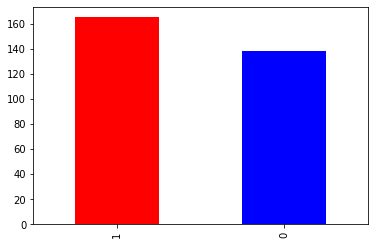

In [18]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [24]:
#EDA Comparing age to Target
df.age.value_counts()
# pd.crosstab(df.target,df.age)

age,29,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,3,2,3,2,3,2,3,3,4,2,6,5,6,10,12,9,8,7,7,6,4,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,8,6,4,3,4,3,4,9,9,6,10,3,5,7,7,5,3,1,4,3,6,4,4,3,2,2,1,3,1,1,0


In [22]:
# Comparing sex with The Target
# df.sex.value_counts()
pd.crosstab(df.target,df.sex)

# This means more women-75% and male 55% have the Heart-Disease

sex,0,1
target,,
0,24,114
1,72,93


In [25]:
df["thalach"].value_counts()
#  Maximum Heart Rate Achieved
#  Clear Pattern of Higher Heart Rates having higher Heart Disease Chances


162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

Text(0, 0.5, 'Max-Heart-Rate')

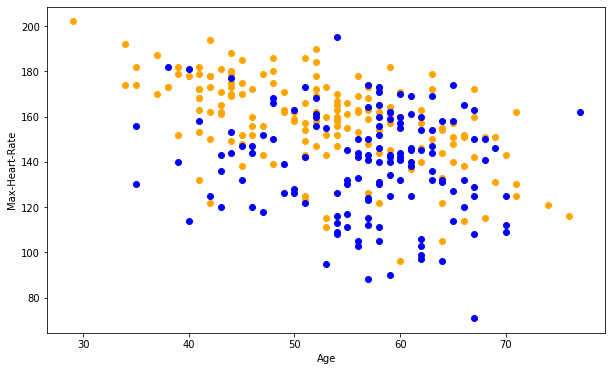

In [31]:
#  Age and Realtion of Heart Rate 
plt.figure(figsize=(10,6))
# Scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='orange')
#  Downward Trend 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="blue")
plt.xlabel("Age")
plt.ylabel("Max-Heart-Rate")
# plt.legend("Heart Disease", "No Heart Disease")


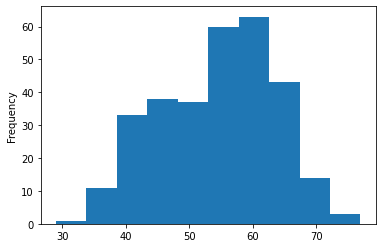

In [33]:
#  Checking Age Distro
df.age.plot.hist()
#  More Like Normal Distributions

In [35]:
# Chest Pain types vs Occurence of the Heart Disease
pd.crosstab(df.cp,df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [36]:
#  Correlations 
#  Correlation matrices
df.corr()
#  This gives a clear idea of how each variable impacts the Other Variable 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


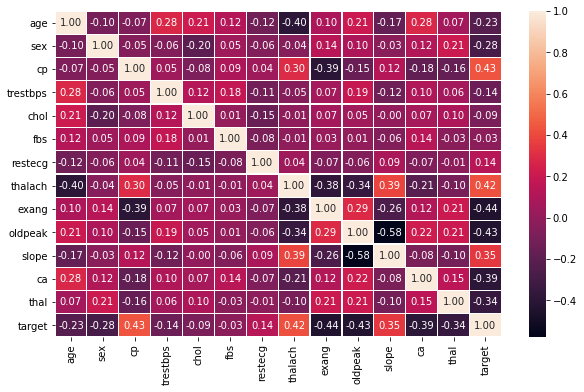

In [37]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.3,fmt=".2f")

In [42]:
# Splitting data for training and Testing 
x=df.drop("target",axis=1)
y=df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# Training Data
#  Model 1 Logistic Regression
# Model 2  K-Nearest Neighbours 
# Model 3 Random Forests
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest ": RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  # Looping through the Models for filling out the Dictionary
  for name,model in models.items():
    model.fit(x_train,y_train)
    # This will train all the Models
    model_scores[name]=model.score(x_test,y_test)
  return model_scores

model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest ': 0.8360655737704918}

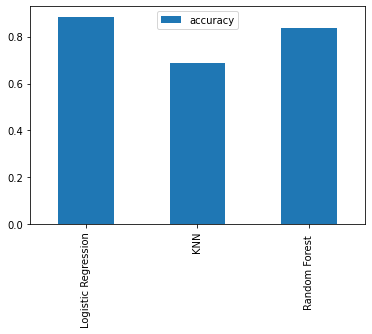

In [43]:
# Since Logistic Regression has got highest score we further look 
# Model-Comparison
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

#  T for Transposing them separately 


In [50]:
# Logistic Regression is a baseline model
# Hyper-Parameters
# Tuning 
# Confusion Matrix 
# Other Evaluations
# Accuracy
# Cross-Validations
# Recall Score
# ROC_Scores
# ROC and AUC

# Hyperparams Tuning
train_scores=[]
test_scores=[]
neighbors=range(1,21)
# Setting Up a KNN Instance
knn=KNeighborsClassifier()
# Looping through the neighbours

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train,y_train)
  # Update the Training Scores List
  train_scores.append(knn.score(x_train,y_train))
  test_scores.append(knn.score(x_test,y_test))
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN Score on the testset:75.41%


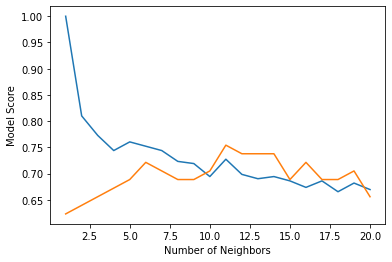

In [51]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
print(f"Maximum KNN Score on the testset:{max(test_scores)*100:.2f}%")


In [ ]:
# Hyper Parameters 
